<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-I:-Basics" data-toc-modified-id="Part-I:-Basics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part I: Basics</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Imports-and-data-structures" data-toc-modified-id="Imports-and-data-structures-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports and data structures</a></span></li><li><span><a href="#Construction-of-probability-trees-using-factory-functions" data-toc-modified-id="Construction-of-probability-trees-using-factory-functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Construction of probability trees using factory functions</a></span></li></ul></li><li><span><a href="#Firing-squad-(deterministic)" data-toc-modified-id="Firing-squad-(deterministic)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Firing squad (deterministic)</a></span><ul class="toc-item"><li><span><a href="#S1:-Prediction" data-toc-modified-id="S1:-Prediction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>S1: Prediction</a></span></li><li><span><a href="#S2-Abduction" data-toc-modified-id="S2-Abduction-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>S2 Abduction</a></span></li><li><span><a href="#S3-Transduction" data-toc-modified-id="S3-Transduction-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>S3 Transduction</a></span></li><li><span><a href="#S4-Action" data-toc-modified-id="S4-Action-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>S4 Action</a></span></li><li><span><a href="#S5-Counterfactual" data-toc-modified-id="S5-Counterfactual-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>S5 Counterfactual</a></span></li></ul></li><li><span><a href="#Probability-of-necessary-causation" data-toc-modified-id="Probability-of-necessary-causation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Probability of necessary causation</a></span></li><li><span><a href="#Firing-squad-(probabilistic)" data-toc-modified-id="Firing-squad-(probabilistic)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Firing squad (probabilistic)</a></span><ul class="toc-item"><li><span><a href="#Probabilistic-firing-squad" data-toc-modified-id="Probabilistic-firing-squad-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Probabilistic firing squad</a></span></li><li><span><a href="#Probability-tree" data-toc-modified-id="Probability-tree-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Probability tree</a></span></li><li><span><a href="#S6-Probabilistic-counterfactual" data-toc-modified-id="S6-Probabilistic-counterfactual-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>S6 Probabilistic counterfactual</a></span></li></ul></li><li><span><a href="#Kamchatka" data-toc-modified-id="Kamchatka-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Kamchatka</a></span><ul class="toc-item"><li><span><a href="#Mechanisms-of-the-Kamchatka-question" data-toc-modified-id="Mechanisms-of-the-Kamchatka-question-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Mechanisms of the Kamchatka question</a></span></li></ul></li><li><span><a href="#Variants-of-the-probability-tree-factory" data-toc-modified-id="Variants-of-the-probability-tree-factory-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Variants of the probability tree factory</a></span><ul class="toc-item"><li><span><a href="#Misspecified-Firing-squad-story" data-toc-modified-id="Misspecified-Firing-squad-story-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Misspecified Firing squad story</a></span></li><li><span><a href="#Firing-squad-story-with-A-defined-first" data-toc-modified-id="Firing-squad-story-with-A-defined-first-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Firing squad story with A defined first</a></span></li><li><span><a href="#Firing-squad-story-with-B-defined-first" data-toc-modified-id="Firing-squad-story-with-B-defined-first-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Firing squad story with B defined first</a></span></li></ul></li></ul></div>


# Part I: Basics



## Setup

First we install the `graphviz` package:

In [1]:
!apt-get install graphviz
!pip install graphviz

/bin/sh: apt-get: command not found


## Imports and data structures

We import Numpy and Pyplot, and then we define the basic data structures for
this tutorial.

In [2]:
#@title Imports

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from probability_trees import MinCut, Critical, PTree

## Construction of probability trees using factory functions

Building probability trees can be difficult, especially when we have to manually
specify all its nodes. 

To simplify this, we could design a function `factory(bvar)` which: 
-   receives a dictionary `bvar` of bound random variables, such as 
`{ 'X': '1', 'Y': '0' }` 
-   and returns a list of transitions and their statements, such as 
`[(0.3, 'Z = 0'), (0.2, 'Z = 1'), (0.5, 'Z = 2')].` If all relevant
events have been defined already, return `None`.

Such a function contains all the necessary information for building a
probability tree. We call this a **probability tree factory**. We can pass a
description function to the method `PTree.fromFunc()` to build a probability
tree.

The advantage of using this method is that we can exploit symmetries (e.g.
conditional independencies) to code a much more compact description of the
probability tree. Essentially, it is like specifying a probabilistic program.

# Firing squad (deterministic)

Consider a two-man firing squad as depicted in Figure 7.1, where $A, B, C, D$, and $U$ stand for the following propositions:
* $U$ = court orders the execution;
* $C$ = captain gives a signal;
* $A$ = rifleman A shoots;
* $B$ = rifleman B shoots;
* $D$ = prisoner dies.

Assume that the court’s decision is unknown, that both riflemen are accurate, alert, and law-abiding, and that the prisoner is not likely to die from fright or other extraneous causes. We wish to construct a formal representation of the story, so that the following sentences can be evaluated mechanically.

![Firing-squad](FiringSquad.png)

Pearl, Judea. Causality (p. 207). Cambridge University Press. Kindle Edition. 

In [3]:
def deterministic_firing_squad(bvar):
    # bvar contains a dictionary of bound variables. 
    if 'Court' not in bvar:
        return court_decision_is_unknown(p=0.5)
    if 'Captain' not in bvar:
        return captain_signals_if_court_orders( bvar['Court'] )
    if 'RiflemanA' not in bvar:
        return rifleman_A_shoots_if_captain_signals( bvar['Captain'] )
    if 'RiflemanB' not in bvar:
        return rifleman_B_shoots_if_captain_signals( bvar['Captain'] )
    if 'Prisoner' not in bvar:
        return prisoner_dies_if_rifleman_A_or_B_shoots( bvar['RiflemanA'],
                                                        bvar['RiflemanB'] )
    return None

def court_decision_is_unknown( p = 0.5 ):
    return [(1-p,'Court=NoOrder'), 
            (p,  'Court=Order')]


def captain_signals_if_court_orders(court):
    if court == 'NoOrder':
        return [(1,'Captain=NoSignal'),
                (0,'Captain=Signal')]
    else:
        return [(0,'Captain=NoSignal'),
                (1,'Captain=Signal')]   

def rifleman_A_shoots_if_captain_signals( captain ):
    if captain == 'NoSignal':
        return [(1,'RiflemanA=NoShoot'),
                (0,'RiflemanA=Shoot'),
                ]
    else:
        return [(0,'RiflemanA=NoShoot'),
                (1,'RiflemanA=Shoot'),
                ] 

def rifleman_B_shoots_if_captain_signals( captain ):
    if captain == 'NoSignal':
        return [(1,'RiflemanB=NoShoot'),
                (0,'RiflemanB=Shoot'),
                ]
    else:
        return [(0,'RiflemanB=NoShoot'),
                (1,'RiflemanB=Shoot'),
                ] 
def prisoner_dies_if_rifleman_A_or_B_shoots( rifleman_A, rifleman_B ):
    if rifleman_A  == 'NoShoot' and rifleman_B == 'NoShoot':
        return [(1,'Prisoner=Alive'),
                (0,'Prisoner=Dead')]
    else:
        return [(0,'Prisoner=Alive'),
                (1,'Prisoner=Dead')]


 Implementation of the firing squad story as a Probability tree. Note that we specified $P(U)=0.5$, but this does not affect the results.

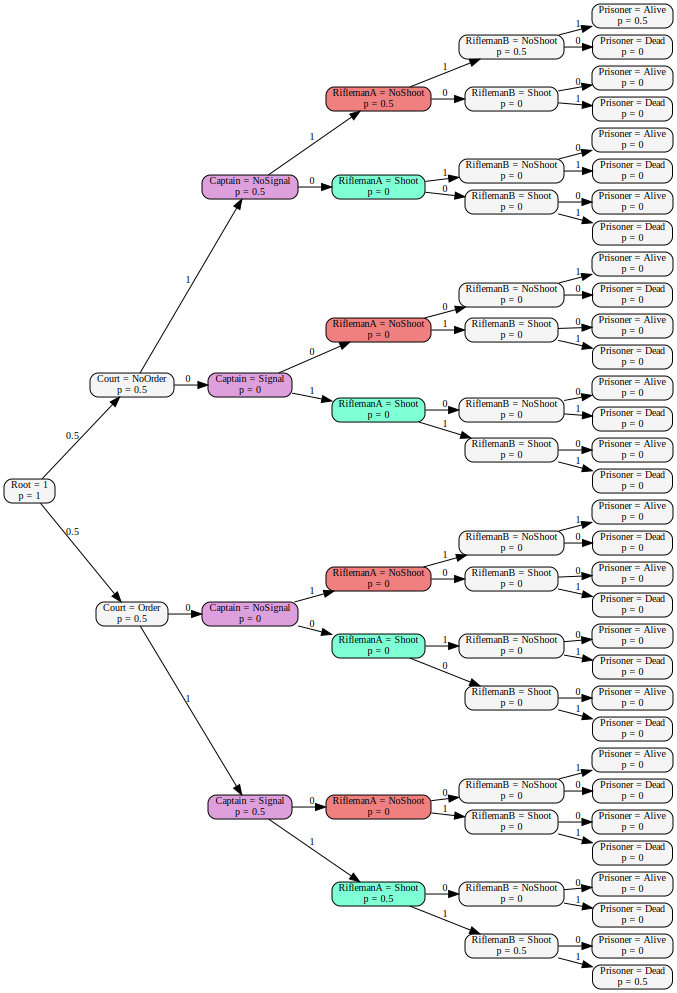

In [4]:
firing_squad = PTree.fromFunc(deterministic_firing_squad, 'Root = 1')
#fs = PTree.fromFunc(B_first_firing_squad, 'Root = 1')
#fs = PTree.fromFunc(misspecified_firing_squad, 'Root = 1')
cut = firing_squad.prop('RiflemanA=Shoot')
crit = firing_squad.critical(cut)
display(firing_squad.show(show_prob=True,cut=cut, crit=crit))


## S1: Prediction
 If rifleman A did not shoot, then the prisoner is alive.
 
 $$\lnot A\implies \lnot D$$
 
 

In [5]:
from IPython.display import Latex


given_A_did_not_shoot = firing_squad.see(~firing_squad.prop('RiflemanA=Shoot'))
prisoner_is_alive = firing_squad.prop('Prisoner=Alive')
display(Latex('Probability that the prisoner is alive given that rifleman A did not shoot'))
display(Latex(f'$$P(\lnot D | \lnot A) = {given_A_did_not_shoot.prob(prisoner_is_alive)}$$'))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## S2 Abduction
If the prisoner is alive, then the captain did not signal.

$$\lnot D \implies \lnot C$$

In [6]:

given_prisoner_is_alive = firing_squad.see(firing_squad.prop('Prisoner=Alive'))
captain_did_not_signal = ~firing_squad.prop('Captain=Signal')
display(Latex('Probability that the captain did not signal given that the prisoner is alive.' ))
display(Latex('$$P(\lnot C | \lnot D) = '
              f'{given_prisoner_is_alive.prob(captain_did_not_signal)}$$'))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## S3 Transduction

If rifleman A shot, then B shot as well

$$A\implies B$$

In [7]:
display(Latex('Probability that rifleman B shot given that rifleman A shot.')) 

given_rifleman_A_shot = firing_squad.see(firing_squad.prop('RiflemanA=Shoot'))
rifleman_B_shot = firing_squad.prop('RiflemanB=Shoot')
display(Latex(f'$$P(B | A) = {given_rifleman_A_shot.prob(rifleman_B_shot)}$$'))
                                                  


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## S4 Action
If the captain gave no signal and rifleman A decides to shoot, then the prisoner will die and B will not shoot.

$$\lnot C\implies D_A \wedge \lnot B_{A}$$

In [8]:
captain_gave_no_signal = ~firing_squad.prop('Captain=Signal')
what_if_rifleman_A_decides_to_shoot = firing_squad.prop('RiflemanA=Shoot')
given_captain_gave_no_signal_what_if_rifleman_A_decides_to_shoot = firing_squad.see(captain_gave_no_signal).do(what_if_rifleman_A_decides_to_shoot)
prisoner_will_die = firing_squad.prop('Prisoner=Dead')
rifleman_B_will_not_shoot = ~firing_squad.prop('RiflemanB=Shoot')

display(Latex('Probability that the prisoner will die and rifleman B will not shoot if the captain does not signal and rifleman A decides to shoot.'))
display(Latex('$$P(D_{{A}}, \lnot B_{{A}}| \lnot C ) = '
              f'{given_captain_gave_no_signal_what_if_rifleman_A_decides_to_shoot.prob(prisoner_will_die & rifleman_B_will_not_shoot)}$$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## S5 Counterfactual

If the prisoner is dead, then the prisoner would be dead even if rifleman A had not shot

$$D\implies D_{\lnot A}$$

In [20]:
prisoner_is_dead = firing_squad.prop('Prisoner=Dead')
given_prisoner_is_dead = firing_squad.see(prisoner_is_dead)
what_if_rifleman_A_had_not_shot = ~firing_squad.prop("RiflemanA=Shoot")
given_prisoner_is_dead_what_if_rifleman_A_had_not_shot = firing_squad.cf(given_prisoner_is_dead, 
                                                               what_if_rifleman_A_had_not_shot)

display(Latex('Probability that the prisoner is still dead even if rifleman A had not shot.'))
display(Latex('$$P(D_{\lnot A} | D ) = '
              f'{given_prisoner_is_dead_what_if_rifleman_A_had_not_shot.prob(prisoner_is_dead )}$$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
rifleman_A_shot = firing_squad.prop('RiflemanA=Shoot')

given_prisoner_is_dead_and_rifleman_A_shot = firing_squad.see(prisoner_is_dead & rifleman_A_shot)
what_if_rifleman_A_had_not_shot = ~firing_squad.prop("RiflemanA=Shoot")
given_prisoner_is_dead_what_if_rifleman_A_had_not_shot = firing_squad.cf(given_prisoner_is_dead_and_rifleman_A_shot, 
                                                               what_if_rifleman_A_had_not_shot)

display(Latex('Probability that the prisoner is still dead even if rifleman A had not shot.'))
display(Latex('$$P(D_{\lnot A} | D  ) = '
              f'{given_prisoner_is_dead_what_if_rifleman_A_had_not_shot.prob(prisoner_is_dead )}$$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

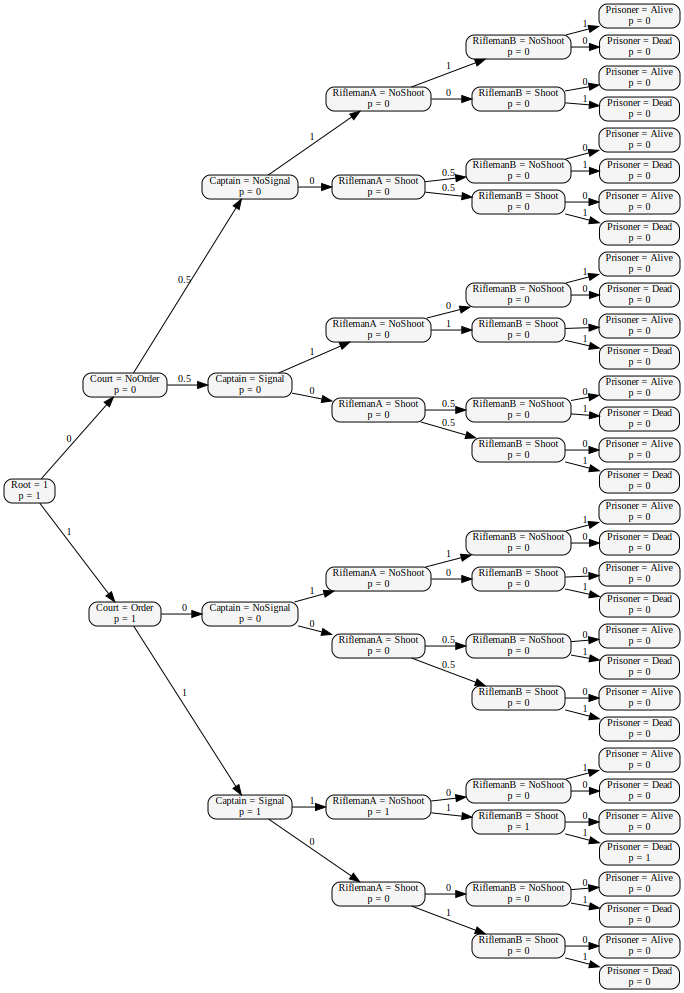

In [22]:
given_prisoner_is_dead_and_rifleman_A_shot.do(what_if_rifleman_A_had_not_shot).show(show_prob=True
                                                                                           cut=prisoner_is_dead,
                                                                                   )

# Probability of necessary causation

$$P(y'_{x'} | y, x)$$

We observe rifleman A shot and prisoner is dead.
What if rifleman A did not shoot, would prisoner be alive

In [ ]:
display(given_prisoner_is_dead, )

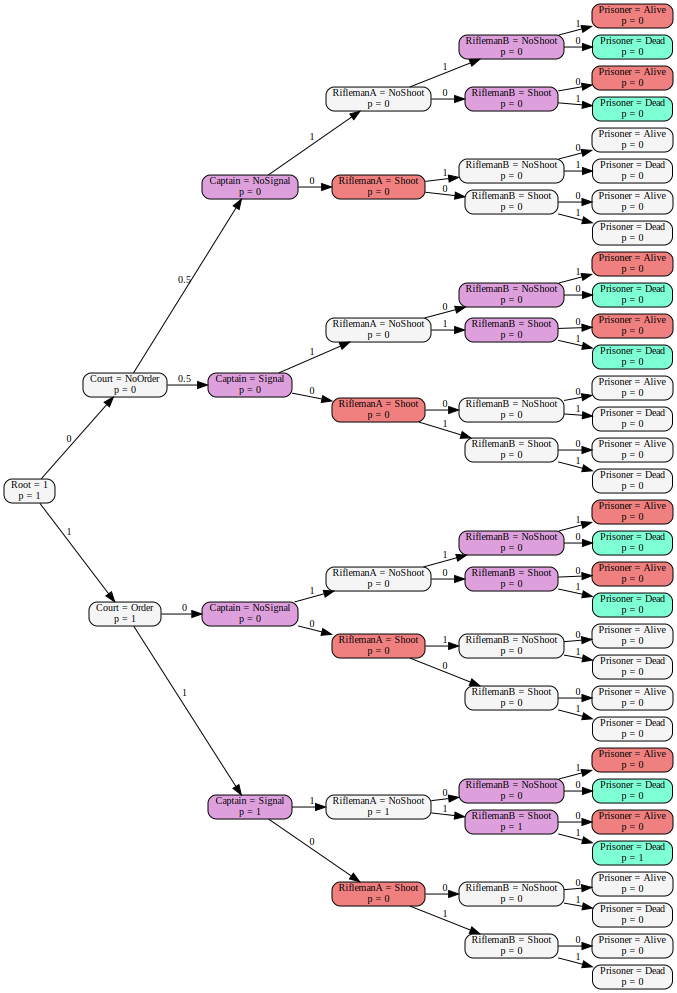

In [10]:
rifleman_A_does_not_shoot_and_prisoner_is_dead =  (~firing_squad.prop('RiflemanA=Shoot') & 
                                                    firing_squad.prop("Prisoner=Dead"))
display(given_prisoner_is_dead_what_if_rifleman_A_had_not_shot
        .show(show_prob=True,
              cut=rifleman_A_does_not_shoot_and_prisoner_is_dead, 
              crit=firing_squad.critical(rifleman_A_does_not_shoot_and_prisoner_is_dead)))

# Firing squad (probabilistic)

Assumptions:
1.   There is a probability $P(U) = p$ that the court has ordered the execution;
2.   Rifleman A has a probability $P(W)=q$ of pulling the trigger out of nervousness; and
3.   Rifleman A’s nervousness is independent of $U$.

In [23]:

def probabilistic_firing_squad(bvar):
    # Define the Court order and Nervous Rifleman A events.
    if 'Court' not in bvar or 'Nervous' not in bvar:
        return court_decision_and_nervousness_are_independent(p=0.5,q=0.1)
    if 'Captain' not in bvar:
        return captain_signals_if_court_orders( bvar['Court'] )
    if 'RiflemanA' not in bvar:
        return rifleman_A_shoots_if_captain_signals_or_is_nervous( bvar['Captain'],
                                                                   bvar['Nervous'] )
    if 'RiflemanB' not in bvar:
        return rifleman_B_shoots_if_captain_signals( bvar['Captain'] )
    if 'Prisoner' not in bvar:
        return prisoner_dies_if_rifleman_A_or_B_shoots( bvar['RiflemanA'],
                                                        bvar['RiflemanB'] )
    return None


def court_decision_and_nervousness_are_independent(p=0.5,q=0.1):
    return [((1-p)*(1-q), 'Court=NoOrder,Nervous=NotPullTrigger'), 
            (    p*(1-q), 'Court=Order,  Nervous=NotPullTrigger'),
            ( (1-p)*q,    'Court=NoOrder,Nervous=PullTrigger'),
            (     p*q,    'Court=Order,  Nervous=PullTrigger')]

def rifleman_A_shoots_if_captain_signals_or_is_nervous( captain, nervous ):
    if captain == 'NoSignal' and nervous == 'NotPullTrigger':
        return [(1,'RiflemanA=NoShoot'),
                (0,'RiflemanA=Shoot'),
               ]
    else:
        return [(0,'RiflemanA=NoShoot'),
                (1,'RiflemanA=Shoot')]




## Probabilistic firing squad 
```
Can you show how you would use this in the example? For instance how would you show using the tree structure 
only, without any numbers, that A_||_B | C or that C _||_ D | {A,B}?
``` 
--[@analisereal](https://twitter.com/analisereal/status/1326840853156028418)

## Probability tree

<IPython.core.display.Latex object>

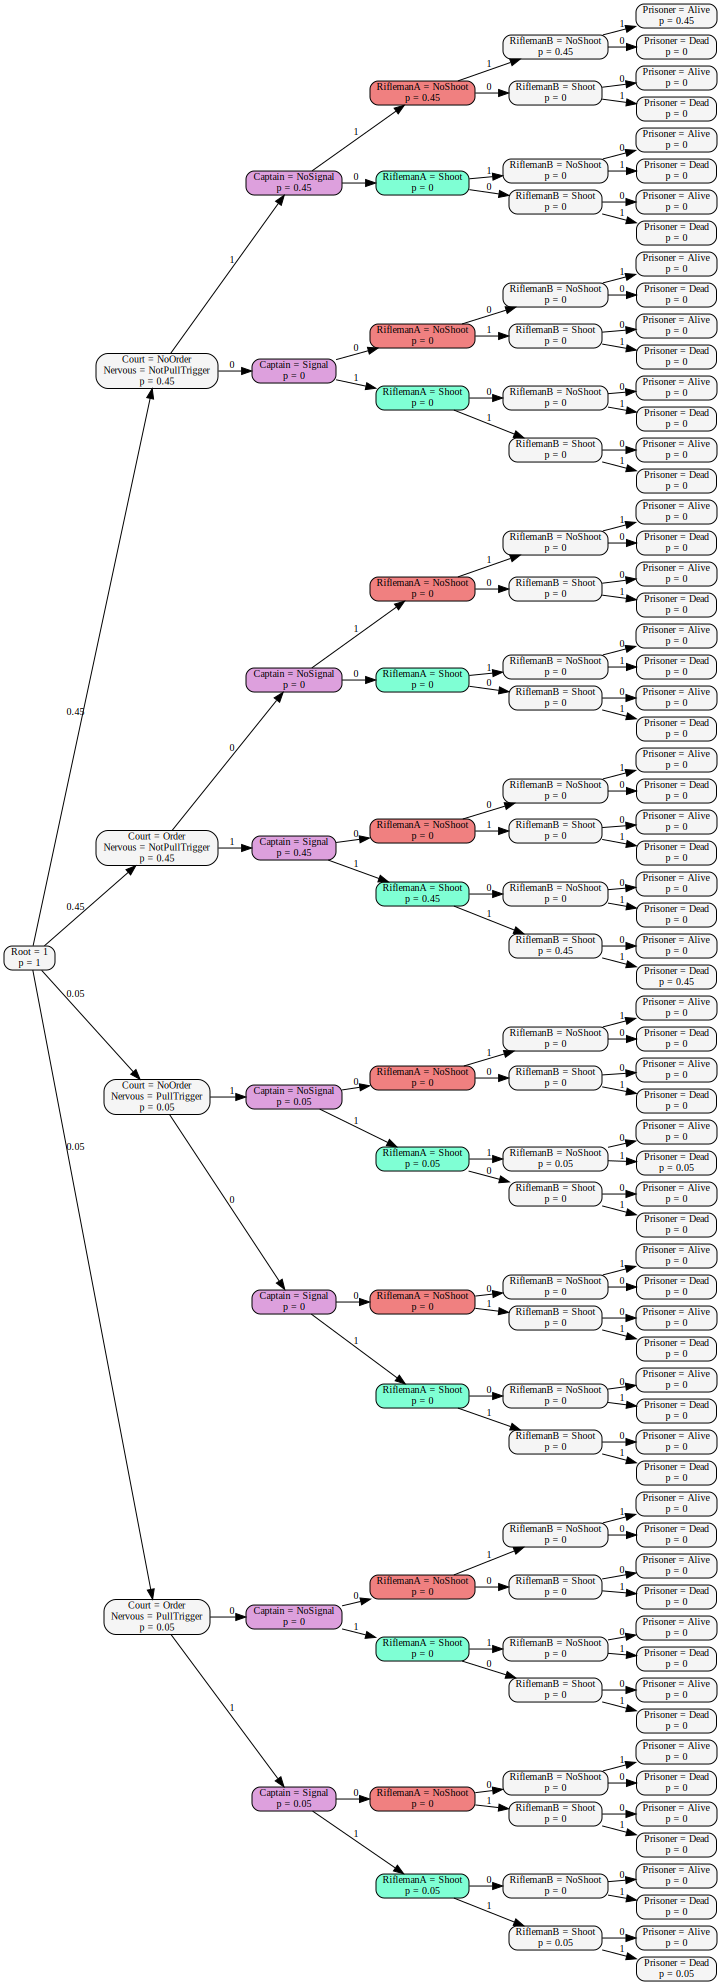

<IPython.core.display.Latex object>

{'Root': '1', 'Court': 'NoOrder', 'Nervous': 'NotPullTrigger', 'Captain': 'NoSignal', 'RiflemanA': 'NoShoot', 'RiflemanB': 'NoShoot', 'Prisoner': 'Alive'}
{'Root': '1', 'Court': 'NoOrder', 'Nervous': 'NotPullTrigger', 'Captain': 'NoSignal', 'RiflemanA': 'NoShoot', 'RiflemanB': 'NoShoot', 'Prisoner': 'Alive'}
{'Root': '1', 'Court': 'NoOrder', 'Nervous': 'NotPullTrigger', 'Captain': 'NoSignal', 'RiflemanA': 'NoShoot', 'RiflemanB': 'NoShoot', 'Prisoner': 'Alive'}
{'Root': '1', 'Court': 'NoOrder', 'Nervous': 'NotPullTrigger', 'Captain': 'NoSignal', 'RiflemanA': 'NoShoot', 'RiflemanB': 'NoShoot', 'Prisoner': 'Alive'}
{'Root': '1', 'Court': 'NoOrder', 'Nervous': 'NotPullTrigger', 'Captain': 'NoSignal', 'RiflemanA': 'NoShoot', 'RiflemanB': 'NoShoot', 'Prisoner': 'Alive'}


In [12]:
nervous_firing_squad = PTree.fromFunc(probabilistic_firing_squad, 'Root = 1')
rifleman_A_shoots = nervous_firing_squad.prop('RiflemanA=Shoot')

display(Latex('\nNervous Firing Squad probability tree:'))

display(nervous_firing_squad.show(show_prob=True, 
                                  crit=nervous_firing_squad.critical(rifleman_A_shoots), 
                                  cut=rifleman_A_shoots))

display(Latex('\nSome samples from the probability tree:'))
for k in range(5):
    print(nervous_firing_squad.sample())

##  S6 Probabilistic counterfactual

With these assumptions, we wish to compute the quantity $P(\lnot D_{\lnot A}|D)$ namely, the probability that the prisoner would be alive if A had not shot, given that the prisoner is in fact dead.

Intuitively, we can figure out the answer by noting that $\lnot D_{\lnot A}$  is true if and only if the court has not issued an order. Thus, our task amounts to that of computing , which evaluates to $\frac{q(1 - p)}{[1 - (1 - q)(1 - p)]}$. However, our aim is to demonstrate a general and formal method of deriving such probabilities, based on (7.4), that makes little use of intuition.


Pearl, Judea. Causality (p. 212). Cambridge University Press. Kindle Edition. 

In [13]:

p,q = 0.5, 0.1
D_star = (q*(1-p))/(1- (1-q)*(1-p))
D_star

0.09090909090909091

If  $p=0.5$ and $q=0.1$, then $$P(\lnot D_{\lnot A}|D) = \frac{q(1 - p)}{[1 - (1 - q)(1 - p)]}  = 0.090909...$$

In [14]:
prisoner_is_dead = nervous_firing_squad.prop('Prisoner=Dead')
prisoner_would_be_alive = nervous_firing_squad.prop('Prisoner=Alive')
given_prisoner_is_dead = nervous_firing_squad.see(prisoner_is_dead)
what_if_rifleman_A_had_not_shot = ~nervous_firing_squad.prop("RiflemanA=Shoot")
given_prisoner_is_dead_what_if_rifleman_A_had_not_shot = nervous_firing_squad.cf(given_prisoner_is_dead, 
                                                                 what_if_rifleman_A_had_not_shot)

display(Latex('Probability that prisoner would be alive if rifleman A had not shot, given that the prisoner is, in fact, dead'))
display(Latex('$$P(\lnot D_{\lnot A} | D ) ='
      f'{given_prisoner_is_dead_what_if_rifleman_A_had_not_shot.prob(prisoner_would_be_alive )}$$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Kamchatka

```To make the question concrete, how do we check that your tree represents our firing squads and not the kind they use  in Kamchatka, where the captain carries a pistol to be used whenever he sees fit. Let's walk through the tree and verify step be step that we are not in Kamchatka
```
-- [Judea Pearl](https://twitter.com/yudapearl/status/1326369755133980674)

I interpret this to mean that if the captain gives the signal and neither rifleman A nor rifleman B shoot, then the prisoner is alive:

$$C \implies \lnot D_{\lnot A \wedge \lnot B}$$

In [25]:
captain_gave_signal = firing_squad.prop('Captain=Signal')
what_if_rifleman_A_and_B_decide_not_to_shoot = (~firing_squad.prop('RiflemanA=Shoot') & 
                                                ~firing_squad.prop('RiflemanB=Shoot'))

given_captain_gave_signal_what_if_rifleman_A_and_B_decide_not_to_shoot = (
    firing_squad.see(captain_gave_signal)
                .do(what_if_rifleman_A_and_B_decide_not_to_shoot))
prisoner_will_live = firing_squad.prop('Prisoner=Alive')

display(Latex('Probability that the prisoner will be alive if the captain signals'
              ' and rifleman A and B decide not to shoot.'))
display(Latex(
    '$$P(\lnot D_{\lnot A\wedge\lnot B},| C ) = '
   f'{given_captain_gave_signal_what_if_rifleman_A_and_B_decide_not_to_shoot.prob(prisoner_will_live)}$$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Mechanisms of the Kamchatka question

The mechanisms of an event are the set of min cuts and critical nodes associated with the event.

In our case, the event that we want to know is whether the prisoner will be alive in a world where the captain signals but neither riflemen shoot.

$$C\wedge \lnot A\wedge\lnot B\wedge \lnot D$$

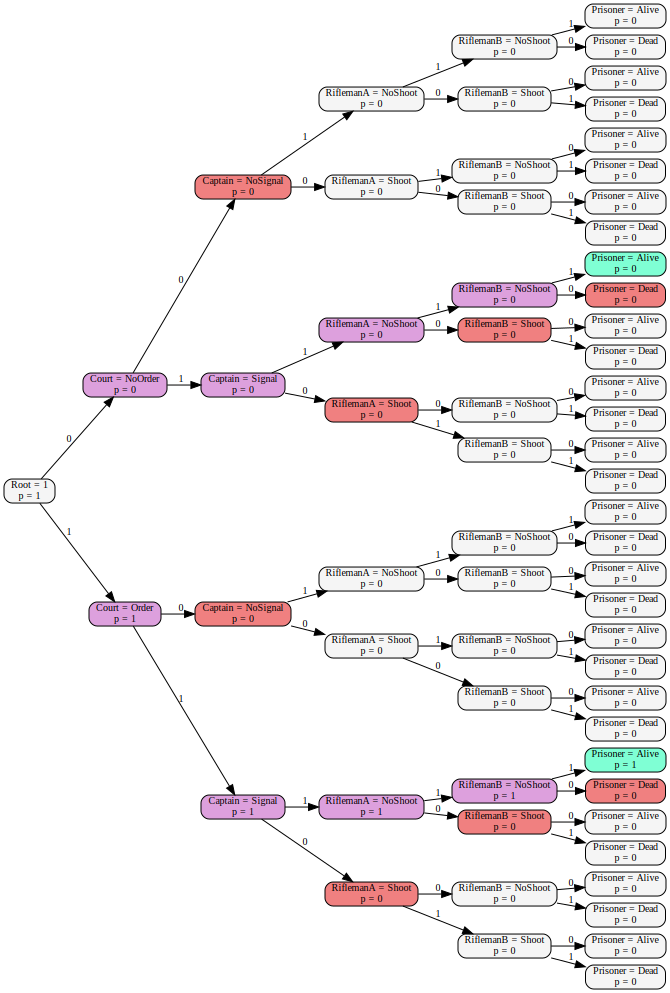

In [16]:
from graphviz import render

captain_signals_but_rifleman_A_and_B_do_not_shoot_and_prisoner_is_alive = (firing_squad.prop('Captain=Signal')  &
                                                                          ~firing_squad.prop('RiflemanA=Shoot') & 
                                                                          ~firing_squad.prop('RiflemanB=Shoot') & 
                                                                           firing_squad.prop("Prisoner=Alive"))
not_Kamchatka = (given_captain_gave_signal_what_if_rifleman_A_and_B_decide_not_to_shoot
        .show(show_prob=True,
              cut=captain_signals_but_rifleman_A_and_B_do_not_shoot_and_prisoner_is_alive, 
              crit=firing_squad.critical(captain_signals_but_rifleman_A_and_B_do_not_shoot_and_prisoner_is_alive)))
not_Kamchatka.save('not_Kamchatka.gv')
render('dot','png', 'not_Kamchatka.gv')
display(not_Kamchatka)

# Variants of the probability tree factory

## Misspecified Firing squad story

Initially, I thought that in order to convert the firing squad DAG to a probability tree, I had to specify $A$ and $B$ as a single node, but this is a misspecification of the Firing Squad story.  It turns out that if both $A$ and $B$ depend on $C$ for their values, then it doesn't matter in which order $A$ and $B$ are defined. As long as they are equivalent topological sorts of the DAG, they both produce the same answer to all probabilistic, interventional and counterfactual queries.

In [17]:
def misspecified_firing_squad(bvar):
    # bvar contains a dictionary of bound variables. 
    if 'Court' not in bvar:
        return court_decision_is_unknown(p=0.5)
    if 'Captain' not in bvar:
        return captain_signals_if_court_orders( bvar['Court'] )
    if 'RiflemanA' not in bvar or 'RiflemanB' not in bvar:
        return rifleman_A_and_B_shoots_if_captain_signals( bvar['Captain'] )
    if 'Prisoner' not in bvar:
        return prisoner_dies_if_rifleman_A_or_B_shoots( bvar['RiflemanA'],
                                                        bvar['RiflemanB'] )
    return None

def rifleman_A_and_B_shoots_if_captain_signals( captain ):
        if captain == 'NoSignal':
            return [(1,'RiflemanA=NoShoot,RiflemanB=NoShoot'),
                    (0,'RiflemanA=NoShoot,RiflemanB=Shoot'),
                    (0,'RiflemanA=Shoot,RiflemanB=NoShoot'),
                    (0,'RiflemanA=Shoot,RiflemanB=Shoot'),  
                    ]
        else:
            return [(0,'RiflemanA=NoShoot,RiflemanB=NoShoot'),
                    (0,'RiflemanA=NoShoot,RiflemanB=Shoot'),
                    (0,'RiflemanA=Shoot,RiflemanB=NoShoot'),
                    (1,'RiflemanA=Shoot,RiflemanB=Shoot'),  
                    ]


## Firing squad story with A defined first

In [18]:
def A_first_firing_squad(bvar):
    if 'Court' not in bvar:
        return court_decision_is_unknown(p=0.5)
    if 'Captain' not in bvar:
        return captain_signals_if_court_orders( bvar['Court'] )
    if 'RiflemanA' not in bvar:
        return rifleman_A_shoots_if_captain_signals( bvar['Captain'] )
    if 'RiflemanB' not in bvar:
        return rifleman_B_shoots_if_captain_signals( bvar['Captain'] )
    if 'Prisoner' not in bvar:
        return prisoner_dies_if_rifleman_A_or_B_shoots( bvar['RiflemanA'],
                                                        bvar['RiflemanB'] )
    return None



## Firing squad story with B defined first

In [19]:
def B_first_firing_squad(bvar):
    if 'Court' not in bvar:
        return court_decision_is_unknown(p=0.5)
    if 'Captain' not in bvar:
        return captain_signals_if_court_orders( bvar['Court'] )
    if 'RiflemanB' not in bvar:
        return rifleman_B_shoots_if_captain_signals( bvar['Captain'] )
    if 'RiflemanA' not in bvar:
        return rifleman_A_shoots_if_captain_signals( bvar['Captain'] )
    if 'Prisoner' not in bvar:
        return prisoner_dies_if_rifleman_A_or_B_shoots( bvar['RiflemanA'],
                                                        bvar['RiflemanB'] )
    return None
